This module draws heavily from and modifies [Introduction to Pandas](https://github.com/fonnesbeck/statistical-analysis-python-tutorial) by Chris Fonnesbeck, which is licensed under the [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

# Pandas

In [39]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
import pandas as pd
import numpy as np
from IPython.display import display

## Data structures

In [3]:
# Series, indexes
concs = pd.Series([1.1, 2.3, 1.2, 3.5],)
concs.values
concs.index

# Explicit indices
concs = pd.Series([1.1, 2.3, 1.2, 3.5],
                  index = ["CO2", "CH4", "NO2", "O3"])

# Accessing elements of series
concs.CO2 # attribute
concs['CH4'] # key
["O" in formula for formula in concs.index] # looping
concs[0] # positional indexing

# Naming the indices, the values
concs.name = "concentrations (ppb)"
concs.index.name = "compound"

# Numpy-like behavior
concs[0:2]
concs + concs
np.log(concs)
concs[concs > 2]

# Are these the same?  Think about how to ask this.
slice1 = concs["CO2":"NO2"]
slice2 = concs[0:2]
# Inclusive endpoints when slicing using indices

# Construction using dictionaries, Note sorting
concs_dict = {"CO2": 1.1, "CH4": 2.3, 
              "NO2": 1.2, "O3": 3.5}
concs = pd.Series(concs_dict)

# Specifying indices, NaN, alignment of dissimilar series
concs2 = pd.Series(concs_dict, index=["CO2", "CH4", "NO2", "H2O"])
concs2.isnull()
concs + concs2

CH4    4.6
CO2    2.2
H2O    NaN
NO2    2.4
O3     NaN
dtype: float64

In [4]:
# DataFrames - Tabular data structures
atmo = pd.DataFrame({"conc": [1.1, 2.3, 1.2, 3.5],
                     "weight":[44, 16, 46, 48],
                     "formula":["CO2", "CH4", "NO2", "O3"]})

# Indexes, columns
atmo.index # like row labels
atmo.columns

# accessing columns by key, attribute
atmo.weight
atmo['formula']
# diff from series, where index access via attribute/key

# Accessing rows, why are these two things different?
atmo.ix[0]
atmo.ix[0:1]
# Hint, use the type function

atmo.T
atmo.index = atmo.formula

## Real data

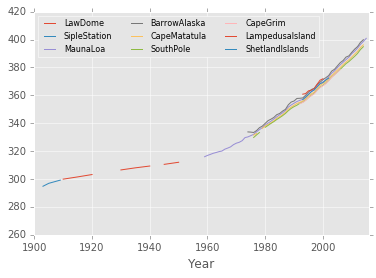

In [61]:
co2 = pd.read_csv("../data/atmo_CO2.csv")
co2 = pd.read_csv("../data/atmo_CO2.csv", index_col = "Year")

co2 = co2.drop("StanfordCalifornia", axis = 1)
# or
co2 = co2.dropna(axis = 1, how = "all")

#co2.info()
#co2.describe()

#co2.plot(legend = False)
co2.ix[:, co2.columns != "EPICADome"].plot(legend = False)

## Concatenation

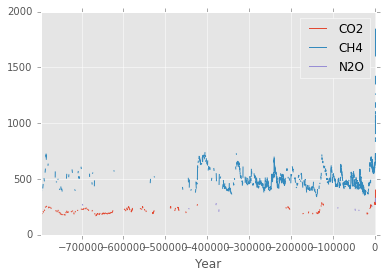

In [137]:
co2.mean(axis=1)
ch4 = pd.read_csv("../data/atmo_CH4.csv", index_col = "Year")
n2o = pd.read_csv("../data/atmo_N2O.csv", index_col = "Year")

# Concat
summary = pd.concat([chem.mean(axis=1) for chem in [co2, ch4, n2o]], axis=1)
summary.columns = ["CO2", "CH4", "N2O"]
summary.plot()

## Fill in missing data

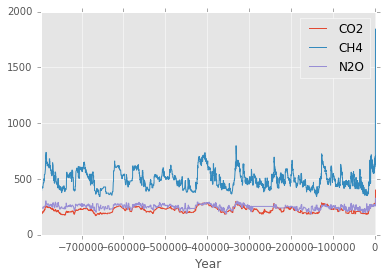

In [141]:
summary = summary.fillna(method = "bfill")
summary.plot()

## Writing to file

In [143]:
summary.to_csv("atmo_summary.csv")